In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2 
import mediapipe as mp
from mediapipe.python.solutions.drawing_utils import _normalized_to_pixel_coordinates
import os
from scipy.spatial import distance as dist
import pandas as pd

# from google.colab.patches import cv2_imshow
import mediapipe as mp
import numpy as np
import pandas as ps
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from numpy import *
from matplotlib.colors import ListedColormap



In [ ]:
# saan manggagaling ang vids
# path = "C:/Users/sokiy/Desktop/Thesis/syllables/To/to-3.mp4"
path = "saba-1.mp4"
lenList = []
ext = ('.mp4')


In [ ]:
#setting for face detect
STATIC_IMAGE = False
MAX_NO_FACES = 1
DETECTION_CONFIDENCE = 0.6
TRACKING_CONFIDENCE = 0.5

COLOR_RED = (0, 0, 255)
COLOR_BLUE = (255, 0, 0)
FACE = [10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 397, 365, 379, 378, 400,
        377, 152, 148, 176, 149, 150, 136, 172, 58, 132, 93, 234, 127, 162, 21, 54, 103, 67, 109]
LIPS = [78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 324, 318, 402, 317, 14, 87, 178, 88, 95, 61, 185, 40, 39, 37,
        0, 267, 269, 270, 409, 291, 375, 321, 405, 314, 17, 84, 181, 91, 146]

In [ ]:
face_mesh = mp.solutions.face_mesh

# for drawing
draw_utils = mp.solutions.drawing_utils
landmark_style = draw_utils.DrawingSpec((0, 255, 0), thickness=1, circle_radius=1)

# face detection
mp_face = mp.solutions.face_detection.FaceDetection(
    model_selection=1,  # model selection
    min_detection_confidence=0.5  # confidence threshold
)
face_model = face_mesh.FaceMesh(static_image_mode=STATIC_IMAGE,
                                max_num_faces=MAX_NO_FACES,
                                min_detection_confidence=DETECTION_CONFIDENCE,
                                min_tracking_confidence=TRACKING_CONFIDENCE)


In [ ]:
syllableCat = []
idx = []
ct = 0
lenList = []

In [ ]:
naem = path.split(".")[0] 
naema = naem.split("/")[-1] 

In [ ]:
print(naema)

saba-1


In [ ]:
def getContours(img, imgContour):
    # find all the contours from the B&W image
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # needed to filter only our contours of interest
    finalContours = []

    # for each contour found
    for cnt in contours:
        # cv2.drawContours(imgContour, cnt, -1, (255, 255, 0), 1)
        # find its area in pixel
        area = cv2.contourArea(cnt)
        # print("Detected Contour with Area: ", area)

        perimeter = cv2.arcLength(cnt, True)

        # smaller epsilon -> more vertices detected [= more precision]
        epsilon = 0.002 * perimeter
        # check how many vertices
        approx = cv2.approxPolyDP(cnt, epsilon, True)
        # print(len(approx))

        finalContours.append([len(approx), area, approx, cnt])

    # print("---\nFinal number of External Contours: ", len(finalContours))
    # sorting in descending order depending on the area
    finalContours = sorted(finalContours, key=lambda x: x[1], reverse=True)

    # drawing contours for the final objects
    # for con in finalContours:
    #    cv2.drawContours(imgContour, con[3], -1, (0, 0, 255), 3)

    return imgContour, finalContours

In [ ]:
def getGeometricFeatures(img):
    mpFaceMesh = mp.solutions.face_mesh
    faceMesh = mpFaceMesh.FaceMesh(max_num_faces=1)
    
#     print("PATH: ",path)
#     img = cv2.imread(path)
#     b,g,r = cv2.split(img)           # get b, g, r
#     rgb_img1 = cv2.merge([r,g,b])
    
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = faceMesh.process(imgRGB)

    width = 0
    heigh = 0
    mouth = 0
    
    p_up_inner = 0
    p_down_inner = 0
    p_right_inner = 0
    p_left_inner = 0
    top_mouth = 0
    p_up_outer = 0
    p_down_outer = 0
    p_left_outer = 0
    
    
    a_up = 0
    a_down = 0
    b_up = 0
    b_down = 0
    d_up = 0
    d_down = 0
    e_up = 0
    e_down = 0

    

#     if results.multi_face_landmarks:
        
    if not results.multi_face_landmarks:
        print('No faces detected. ')
    else:
        for faceLns in results.multi_face_landmarks:
            for id_, lm in enumerate(faceLns.landmark):
                ih, iw, ic = img.shape
                x, y , z = int(lm.x*iw), int(lm.y*ih), int(lm.z*ic)

                if id_ == 13: 
                    p_up_inner = [x, y]
                    
                elif id_ == 17: 
                    p_down_outer = [x, y]
                
                elif id_ == 61: 
                    p_left_outer = [x, y]
                    
                elif id_ == 291: 
                    p_right_outer = [x, y]
                    
                elif id_ == 0: 
                    p_up_outer = [x, y]
                    
                elif id_ == 14: 
                    p_down_inner = [x, y] 
                    
                elif id_ == 78: 
                    p_left_inner = [x, y]
                    
                elif id_ == 308: 
                    p_right_inner = [x, y]
                    
                elif id_ == 164: 
                    top_mouth = [x, y]
                    
                elif id_ == 37: 
                    a_up = [x, y]
                    
                elif id_ == 84: 
                    a_down = [x, y]
                    
                elif id_ == 267: 
                    b_up = [x, y]
                    
                elif id_ == 314: 
                    b_down = [x, y]
                    
                elif id_ == 40: 
                    d_up = [x, y]
                    
                elif id_ == 91: 
                    d_down = [x, y]
                    
                elif id_ == 270: 
                    d_up = [x, y]
                    
                elif id_ == 321: 
                    d_down = [x, y]
                    
                    
    if top_mouth != 0:
        width = (p_right_inner[0] - p_left_inner[0])
        heigh = (p_down_inner[1] - p_up_inner[1]) 
        mouth = img[p_up_outer[1]:p_down_outer[1], p_left_outer[0]:p_right_outer[0]]
        
        A = dist.euclidean(a_up, a_down)
        B = dist.euclidean(b_up, b_down)
        C = dist.euclidean(p_up_outer, p_down_outer)
        D = dist.euclidean(d_up, d_down)
        E = dist.euclidean(e_up, d_down)
        
        F = dist.euclidean(p_left_outer, p_right_outer)
        G = (A + B)
        # compute the mouth aspect ratio
        mar = G / (2.0 * F)

        
    return width, heigh, mouth, mar

In [ ]:
def getDarkArea(mouthImage):
    # transform the image into gray scale
    
    grayImage = cv2.cvtColor(mouthImage, cv2.COLOR_BGR2GRAY)
    slicePixelArea = 0
    
    # transform the gray scale image into black and white
    (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 20, 255, cv2.THRESH_BINARY)

    # for the edges of the dark area
    imgCanny = cv2.Canny(blackAndWhiteImage, 255, 195)
    kernel = np.ones((2, 2))
    imgDil = cv2.dilate(imgCanny, kernel, iterations=3)
    imgThre = cv2.erode(imgDil, kernel, iterations=3)
    
    imgFinalContours, finalContours = getContours(imgThre, mouthImage)
#     imgplot = plt.imshow(imgThre) 
#     plt.show()
    imgplot2 = plt.imshow(imgFinalContours) 
    plt.show()
#     cv2.imshow('', imgFinalContours)
    
#     cv2.waitKey(0)

    
    if len(finalContours) != 0:
        slicePixelArea = finalContours[0][1]
#         print("Entire Slice Area in pixel", slicePixelArea)
    return slicePixelArea

In [ ]:
# def getFeatures(path, i, personne):
#     features = []#ps.DataFrame()
#     #features.append(personne)
#     print("Get Feature path: "+ path)
#     for imgName in os.listdir(path):
        
#         image_path = path + "/" + imgName
        
#         width, heigh, mouth = getGeometricFeatures(image_path, 0)
        
#         features.append(width)
#         features.append(heigh)
# #         features.append(getDarkArea(mouth))
# #         dct = getDCTfeatures(image_path)
# #         features.append(dct)
#         #
#     features.append(i)
#     #features = np.resize(features, (1, len(features)))
#     print(features)
#     print("features shape : ", np.array(features).shape)
#     return features

## Feature Extraction


frame:  0


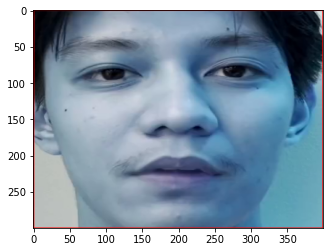

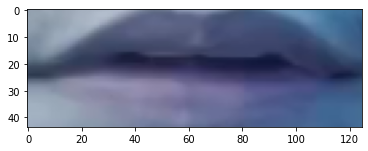

Width:  107
Height:  6
Dark Area:  0

frame:  1


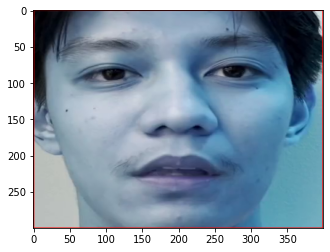

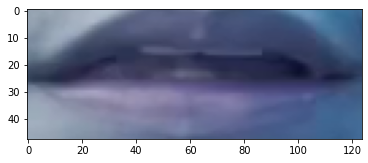

Width:  106
Height:  7
Dark Area:  0

frame:  2


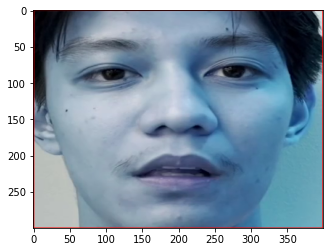

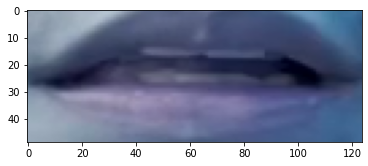

Width:  105
Height:  9
Dark Area:  78.0

frame:  3


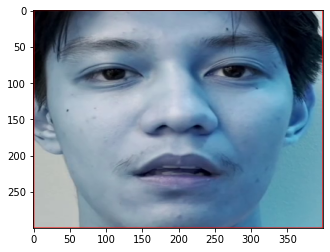

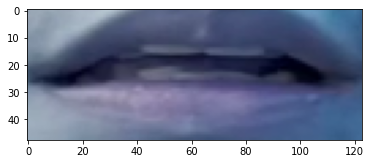

Width:  105
Height:  7
Dark Area:  109.5

frame:  4


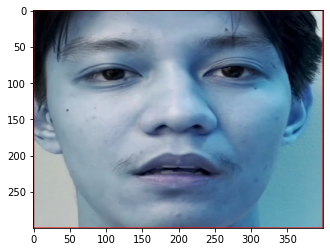

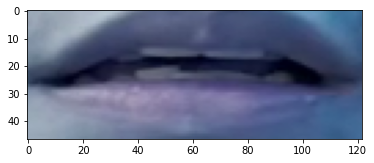

Width:  103
Height:  7
Dark Area:  92.0

frame:  5


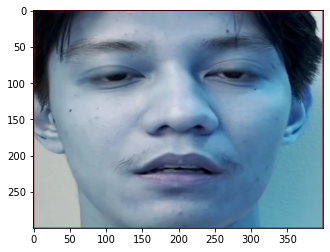

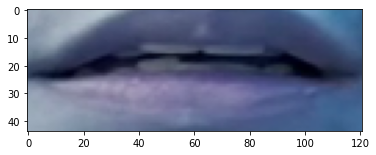

Width:  103
Height:  7
Dark Area:  133.5

frame:  6


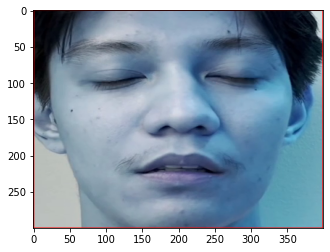

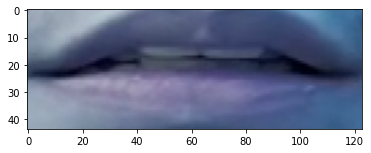

Width:  105
Height:  5
Dark Area:  45.0

frame:  7


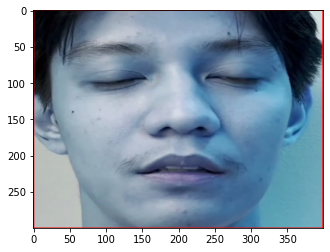

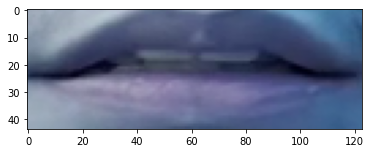

Width:  105
Height:  6
Dark Area:  43.0

frame:  8


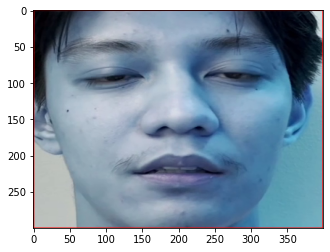

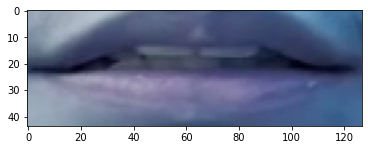

Width:  108
Height:  6
Dark Area:  36.5

frame:  9


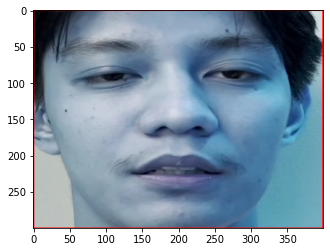

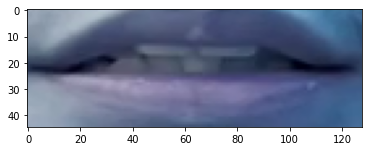

Width:  110
Height:  7
Dark Area:  38.0

frame:  10


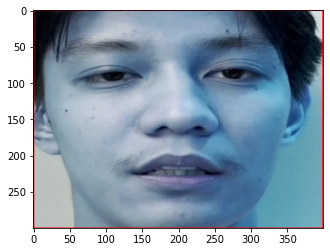

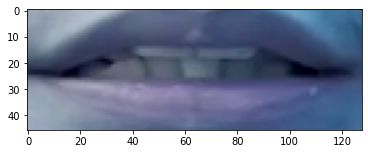

Width:  109
Height:  6
Dark Area:  30.5

frame:  11


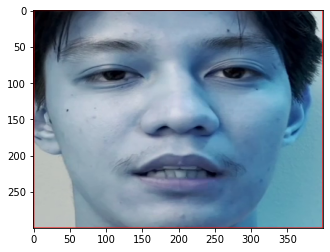

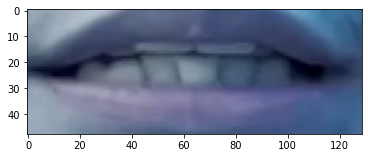

Width:  110
Height:  8
Dark Area:  57.5

frame:  12


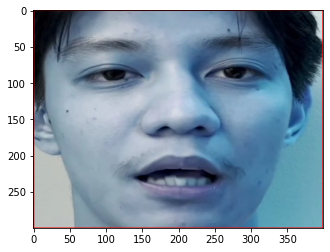

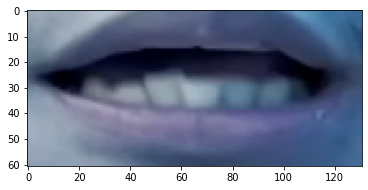

Width:  110
Height:  19
Dark Area:  372.0

frame:  13


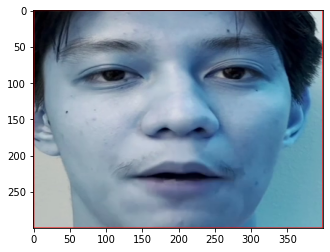

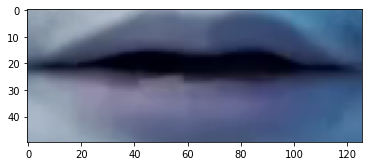

Width:  106
Height:  7
Dark Area:  506.0

frame:  14


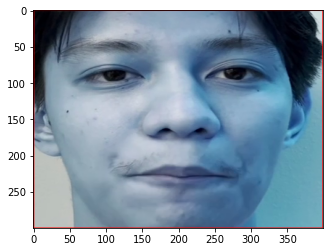

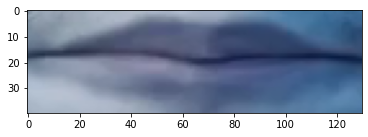

Width:  113
Height:  4
Dark Area:  0

frame:  15


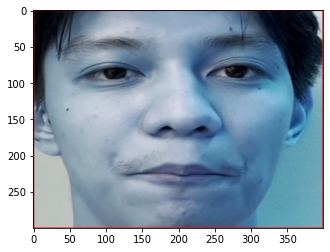

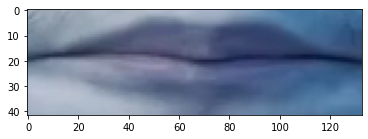

Width:  114
Height:  5
Dark Area:  0

frame:  16


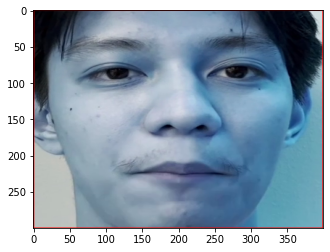

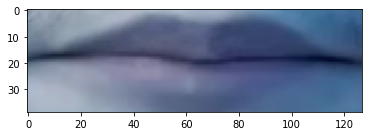

Width:  110
Height:  3
Dark Area:  3.0

frame:  17


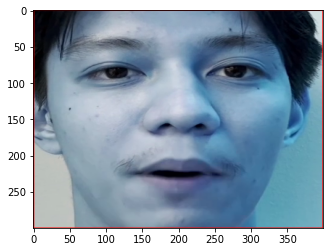

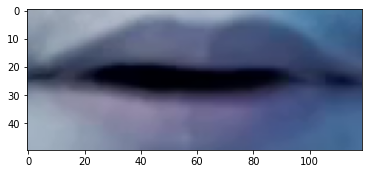

Width:  101
Height:  9
Dark Area:  434.0

frame:  18


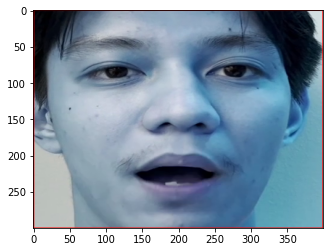

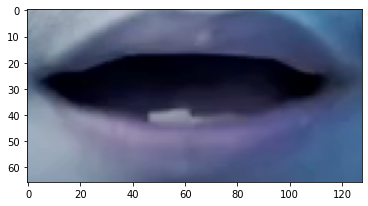

Width:  107
Height:  23
Dark Area:  1219.5

frame:  19


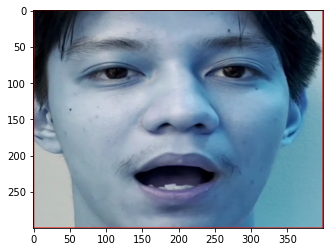

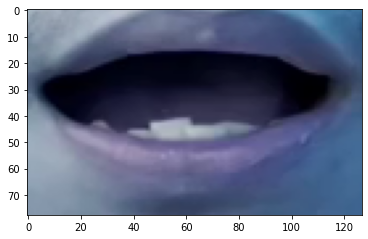

Width:  105
Height:  35
Dark Area:  24.5

frame:  20


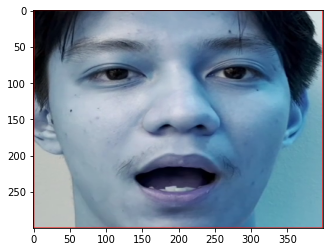

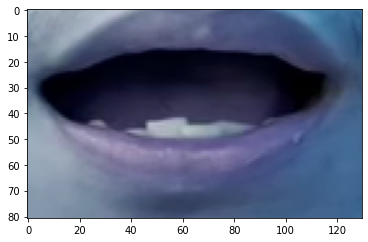

Width:  107
Height:  39
Dark Area:  1369.5

frame:  21


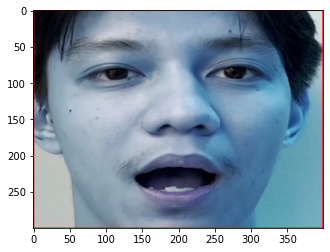

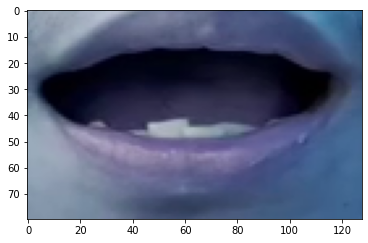

Width:  106
Height:  38
Dark Area:  1377.5

frame:  22


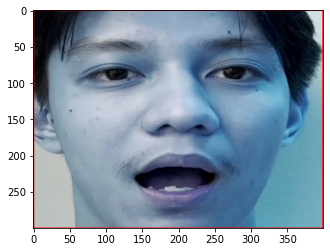

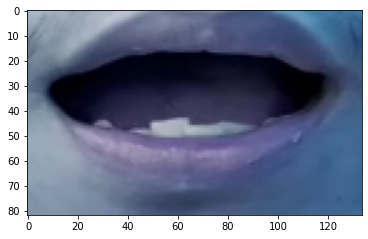

Width:  111
Height:  41
Dark Area:  1326.0

frame:  23


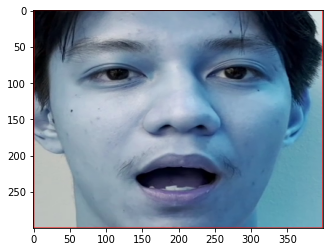

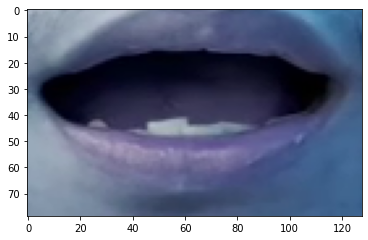

Width:  105
Height:  36
Dark Area:  1286.0

frame:  24


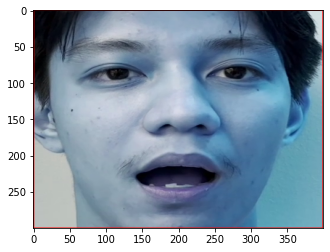

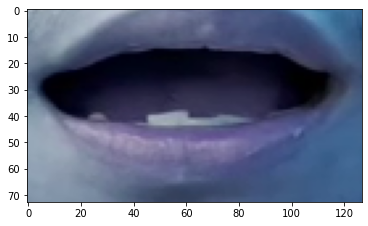

Width:  105
Height:  30
Dark Area:  27.5

frame:  25


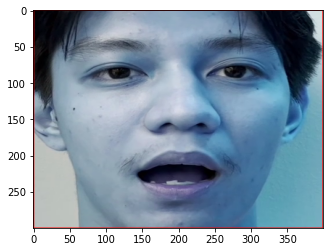

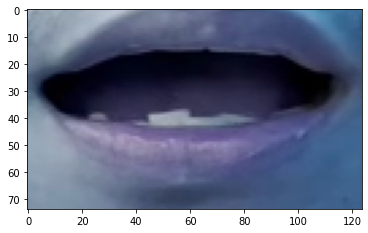

Width:  104
Height:  31
Dark Area:  1150.5

frame:  26


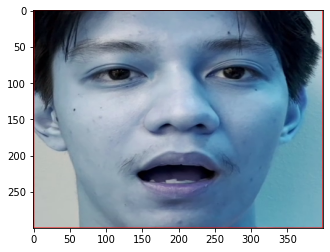

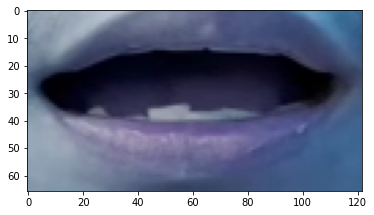

Width:  102
Height:  24
Dark Area:  1056.5

frame:  27


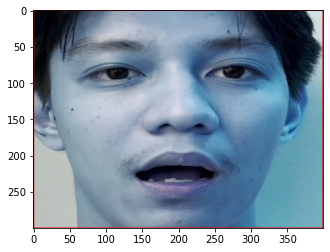

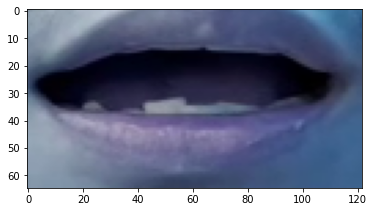

Width:  101
Height:  23
Dark Area:  1014.0

frame:  28


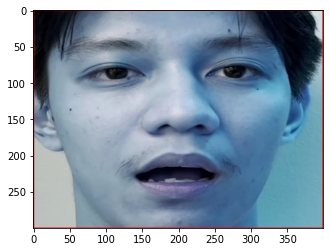

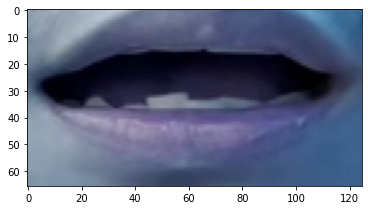

Width:  104
Height:  22
Dark Area:  957.5

frame:  29


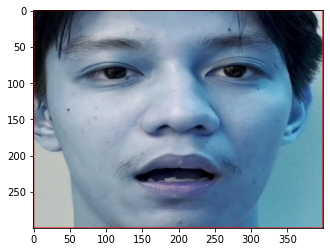

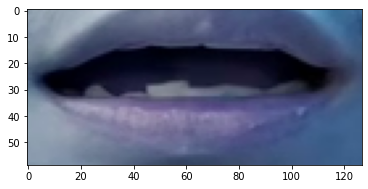

Width:  107
Height:  17
Dark Area:  29.5

frame:  30


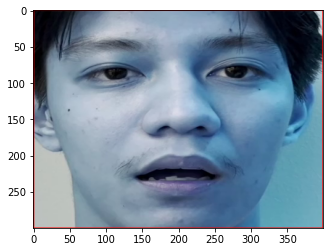

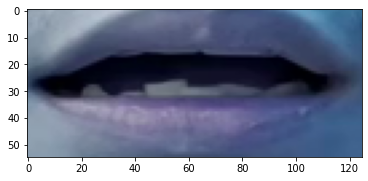

Width:  105
Height:  11
Dark Area:  768.5

frame:  31


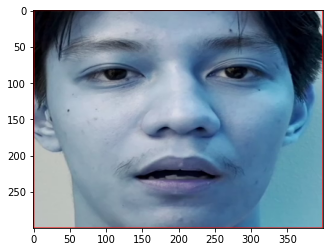

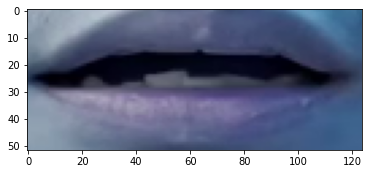

Width:  105
Height:  9
Dark Area:  715.5

frame:  32


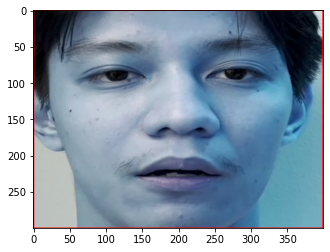

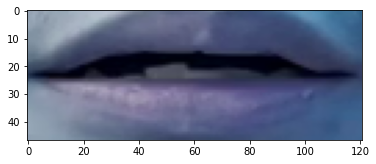

Width:  103
Height:  7
Dark Area:  447.0

frame:  33


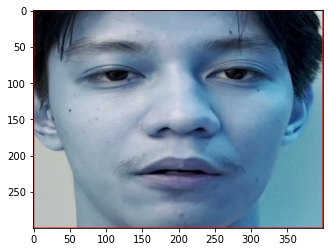

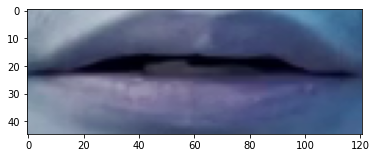

Width:  103
Height:  6
Dark Area:  225.5

frame:  34


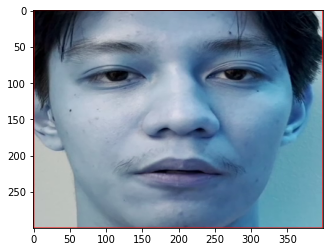

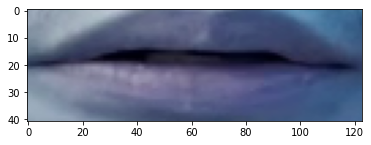

Width:  105
Height:  4
Dark Area:  93.5

frame:  35


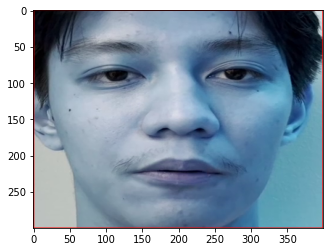

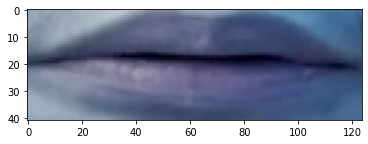

Width:  106
Height:  4
Dark Area:  85.5

frame:  36


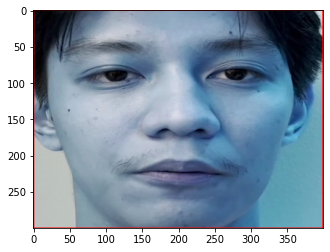

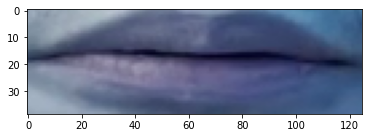

Width:  108
Height:  4
Dark Area:  50.0

frame:  37


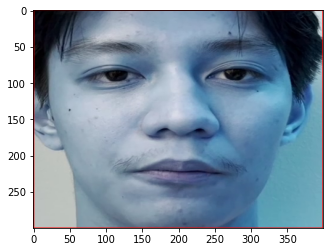

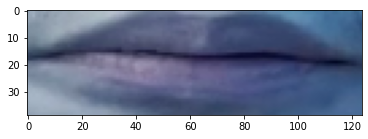

Width:  107
Height:  3
Dark Area:  7.0

frame:  38


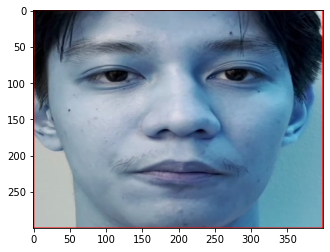

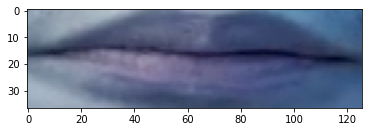

Width:  109
Height:  2
Dark Area:  10.0

frame:  39


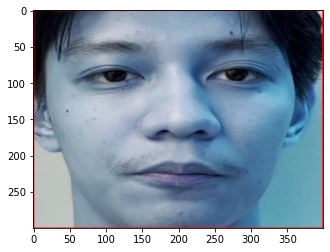

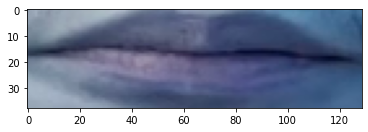

Width:  112
Height:  3
Dark Area:  7.0

frame:  40


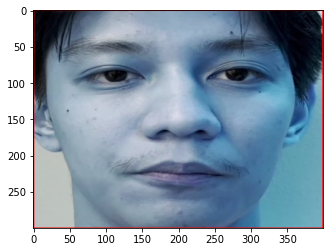

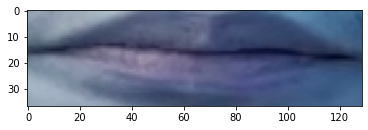

Width:  112
Height:  3
Dark Area:  11.0
geoFeatures:  [107, 6, 106, 7, 105, 9, 105, 7, 103, 7, 103, 7, 105, 5, 105, 6, 108, 6, 110, 7, 109, 6, 110, 8, 110, 19, 106, 7, 113, 4, 114, 5, 110, 3, 101, 9, 107, 23, 105, 35, 107, 39, 106, 38, 111, 41, 105, 36, 105, 30, 104, 31, 102, 24, 101, 23, 104, 22, 107, 17, 105, 11, 105, 9, 103, 7, 103, 6, 105, 4, 106, 4, 108, 4, 107, 3, 109, 2, 112, 3, 112, 3]
Total Frame:  41
[0.35218, 0.39513, 0.39512, 0.3903, 0.38535, 0.37183, 0.36173, 0.35777, 0.34633, 0.35547, 0.35914, 0.36849, 0.46956, 0.40099, 0.31558, 0.31207, 0.31515, 0.41616, 0.50804, 0.60275, 0.61168, 0.61733, 0.59728, 0.6055, 0.56698, 0.58117, 0.53304, 0.52469, 0.52025, 0.46468, 0.44016, 0.42341, 0.39273, 0.37621, 0.33745, 0.3307, 0.32001, 0.31856, 0.3016, 0.29851, 0.29071]
dark_area:  [0, 0, 78.0, 109.5, 92.0, 133.5, 45.0, 43.0, 36.5, 38.0, 30.5, 57.5, 372.0, 506.0, 0, 0, 3.0, 434.0, 1219.5, 24.5, 1369.5, 1377.5, 1326.0, 1286.0, 27.5, 1150.5, 1056.5, 1014.0, 957.5, 29.5, 768.5, 715.5, 447.

In [ ]:
vid = cv2.VideoCapture(path)
temp_height = 0
    
temp_width = 0
temp_dark  = 0
temp_mar = 0
ctr = 0
check_ = 0
class_check = 0
i = 0
geoFeatures = []
sylFeatures =[]
dark_area=[]
mar_Fea = []
hei = []


# if success:
while True: 
    success, frame = vid.read() 
    if not success: 
        break
#     image = cv2.resize(frame, (520, 340))
    image = frame
#     outputs = face_model.process(image)
    results = mp_face.process(image)
    image_rows, image_cols, _ = frame.shape
    if not results.detections:
        print('No faces detected. ')
    else:
        print("\nframe: ", i)
        for detection in results.detections:
            
            detection = results.detections[0]
            location = detection.location_data
             # since mediapipe returns normalized data
            # lalagyan ng bbox yung face
            relative_bounding_box = location.relative_bounding_box
            rect_start_point = _normalized_to_pixel_coordinates(
                relative_bounding_box.xmin, relative_bounding_box.ymin, image_cols,
                image_rows)
            rect_end_point = _normalized_to_pixel_coordinates(
                relative_bounding_box.xmin + relative_bounding_box.width,
                relative_bounding_box.ymin + relative_bounding_box.height, image_cols,
                image_rows)

            color = (255, 0, 0)
            thickness = 2
            cv2.rectangle(frame, rect_start_point, rect_end_point, color, thickness)
            xleft, ytop = rect_start_point
            xright, ybot = rect_end_point

            crop_img = frame[ytop: ybot, xleft: xright]

        # resize and crop
        crop_img = cv2.resize(crop_img, (400, 300))

        annotated_image = crop_img.copy()
        imgplot2 = plt.imshow(annotated_image) 
        plt.show()
        

    width, heigh, mouth, mar = getGeometricFeatures(annotated_image)
        
    geoFeatures.append(width)
    geoFeatures.append(heigh)
    hei.append(heigh)
    mar_Fea.append(round(mar, 5))
    temp_dark = getDarkArea(mouth)
    dark_area.append(temp_dark)
#   Values to append
    temp_height = heigh
    temp_width = width
    temp_mar = mar
    print("Width: ", width)
    print("Height: ", heigh)
    print("Dark Area: ", temp_dark)

    
    i += 1
    

print("geoFeatures: ", geoFeatures)    
    
print("Total Frame: ", i)
print(mar_Fea)
print("dark_area: ",dark_area)
# print(sylFeatures)

In [ ]:
len(geoFeatures)

82

In [ ]:
print("total frame: ", i)

total frame:  41


Setting the features to 2d Array

In [ ]:
f_geoFeatures = list(zip(geoFeatures[::2], geoFeatures[1::2]))
geoFeatures = np.array(f_geoFeatures)

Segmenting Frames into Chunks to Classify per Syllables

In [ ]:
t_geo = []

iter_num = i/18
if i%16 ==0:
    t_geo = np.split(geoFeatures, iter_num)
    
else:
    t_geo = np.array_split(geoFeatures, int(iter_num)+1)
    

In [ ]:
print(t_geo)

[array([[107,   6],
       [106,   7],
       [105,   9],
       [105,   7],
       [103,   7],
       [103,   7],
       [105,   5],
       [105,   6],
       [108,   6],
       [110,   7],
       [109,   6],
       [110,   8],
       [110,  19],
       [106,   7]]), array([[113,   4],
       [114,   5],
       [110,   3],
       [101,   9],
       [107,  23],
       [105,  35],
       [107,  39],
       [106,  38],
       [111,  41],
       [105,  36],
       [105,  30],
       [104,  31],
       [102,  24],
       [101,  23]]), array([[104,  22],
       [107,  17],
       [105,  11],
       [105,   9],
       [103,   7],
       [103,   6],
       [105,   4],
       [106,   4],
       [108,   4],
       [107,   3],
       [109,   2],
       [112,   3],
       [112,   3]])]


In [ ]:
# how many syllables to classify
arr_len = len(t_geo)
for i in range(len(t_geo)):
    print('Syllable to Classify: ', i)
#     length per array
    len_arr = len(t_geo[i])
    print(len_arr)
    
#     if it did not reach the input length, pad
    if len_arr<15:
        num_append = 18-len_arr
        last_arr = t_geo[i][-1]
        for x in range(num_append):
            print("last_arr", last_arr)
            t_geo[i] = np.append(t_geo[i],last_arr)
            print(len(t_geo[i]))
#             print(np.append(t_geo[i], last_arr))
        t_geo[i] = t_geo[i].reshape(-1,2)
    print(t_geo[i])
    
    


Syllable to Classify:  0
14
last_arr [106   7]
30
last_arr [106   7]
32
last_arr [106   7]
34
last_arr [106   7]
36
[[107   6]
 [106   7]
 [105   9]
 [105   7]
 [103   7]
 [103   7]
 [105   5]
 [105   6]
 [108   6]
 [110   7]
 [109   6]
 [110   8]
 [110  19]
 [106   7]
 [106   7]
 [106   7]
 [106   7]
 [106   7]]
Syllable to Classify:  1
14
last_arr [101  23]
30
last_arr [101  23]
32
last_arr [101  23]
34
last_arr [101  23]
36
[[113   4]
 [114   5]
 [110   3]
 [101   9]
 [107  23]
 [105  35]
 [107  39]
 [106  38]
 [111  41]
 [105  36]
 [105  30]
 [104  31]
 [102  24]
 [101  23]
 [101  23]
 [101  23]
 [101  23]
 [101  23]]
Syllable to Classify:  2
13
last_arr [112   3]
28
last_arr [112   3]
30
last_arr [112   3]
32
last_arr [112   3]
34
last_arr [112   3]
36
[[104  22]
 [107  17]
 [105  11]
 [105   9]
 [103   7]
 [103   6]
 [105   4]
 [106   4]
 [108   4]
 [107   3]
 [109   2]
 [112   3]
 [112   3]
 [112   3]
 [112   3]
 [112   3]
 [112   3]
 [112   3]]


In [ ]:
geoFeatures

array([[107,   6],
       [106,   7],
       [105,   9],
       [105,   7],
       [103,   7],
       [103,   7],
       [105,   5],
       [105,   6],
       [108,   6],
       [110,   7],
       [109,   6],
       [110,   8],
       [110,  19],
       [106,   7],
       [113,   4],
       [114,   5],
       [110,   3],
       [101,   9],
       [107,  23],
       [105,  35],
       [107,  39],
       [106,  38],
       [111,  41],
       [105,  36],
       [105,  30],
       [104,  31],
       [102,  24],
       [101,  23],
       [104,  22],
       [107,  17],
       [105,  11],
       [105,   9],
       [103,   7],
       [103,   6],
       [105,   4],
       [106,   4],
       [108,   4],
       [107,   3],
       [109,   2],
       [112,   3],
       [112,   3]])

In [ ]:
# findLocalMaximaMinima(len(mar_Fea), mar_Fea)

In [ ]:
# print(len(geoFeatures))

In [ ]:
#converting to array
# np_geo = np.array(geoFeatures)

In [ ]:
# # trimming zeros
# n_geo = np.trim_zeros(np_geo)

In [ ]:
# print(n_geo)

### Normalize Features

In [ ]:
features = t_geo/np.linalg.norm(t_geo)

In [ ]:
features

array([[[0.13483912, 0.00756107],
        [0.13357894, 0.00882125],
        [0.13231876, 0.01134161],
        [0.13231876, 0.00882125],
        [0.1297984 , 0.00882125],
        [0.1297984 , 0.00882125],
        [0.13231876, 0.00630089],
        [0.13231876, 0.00756107],
        [0.13609929, 0.00756107],
        [0.13861965, 0.00882125],
        [0.13735947, 0.00756107],
        [0.13861965, 0.01008143],
        [0.13861965, 0.02394339],
        [0.13357894, 0.00882125],
        [0.13357894, 0.00882125],
        [0.13357894, 0.00882125],
        [0.13357894, 0.00882125],
        [0.13357894, 0.00882125]],

       [[0.14240019, 0.00504071],
        [0.14366037, 0.00630089],
        [0.13861965, 0.00378054],
        [0.12727804, 0.01134161],
        [0.13483912, 0.02898411],
        [0.13231876, 0.04410625],
        [0.13483912, 0.04914697],
        [0.13357894, 0.04788679],
        [0.13987983, 0.05166732],
        [0.13231876, 0.04536643],
        [0.13231876, 0.03780536],
        [0.1

In [ ]:
arr_length = len(features)

In [ ]:
arr_length

3

In [ ]:
features.shape

(3, 18, 2)

In [ ]:
for i in features:
    print("Iterate\n",i)

Iterate
 [[0.13483912 0.00756107]
 [0.13357894 0.00882125]
 [0.13231876 0.01134161]
 [0.13231876 0.00882125]
 [0.1297984  0.00882125]
 [0.1297984  0.00882125]
 [0.13231876 0.00630089]
 [0.13231876 0.00756107]
 [0.13609929 0.00756107]
 [0.13861965 0.00882125]
 [0.13735947 0.00756107]
 [0.13861965 0.01008143]
 [0.13861965 0.02394339]
 [0.13357894 0.00882125]
 [0.13357894 0.00882125]
 [0.13357894 0.00882125]
 [0.13357894 0.00882125]
 [0.13357894 0.00882125]]
Iterate
 [[0.14240019 0.00504071]
 [0.14366037 0.00630089]
 [0.13861965 0.00378054]
 [0.12727804 0.01134161]
 [0.13483912 0.02898411]
 [0.13231876 0.04410625]
 [0.13483912 0.04914697]
 [0.13357894 0.04788679]
 [0.13987983 0.05166732]
 [0.13231876 0.04536643]
 [0.13231876 0.03780536]
 [0.13105858 0.03906554]
 [0.12853822 0.03024429]
 [0.12727804 0.02898411]
 [0.12727804 0.02898411]
 [0.12727804 0.02898411]
 [0.12727804 0.02898411]
 [0.12727804 0.02898411]]
Iterate
 [[0.13105858 0.02772393]
 [0.13483912 0.02142304]
 [0.13231876 0.013861

### Prediction

In [ ]:
from keras.models import load_model
model = load_model('./holemodel.h5')

OSError: ignored

In [ ]:
y_pred = np.argmax(model.predict(features), axis=0)

In [ ]:
y_pred

Loading the label encoder

In [ ]:
import joblib
label_encoder = joblib.load('label_encoder.joblib')

In [ ]:
le = LabelEncoder()
predictions_test = label_encoder.inverse_transform(y_pred)

In [ ]:
y_pred


In [ ]:
predictions_test.tolist()

In [ ]:
res = "".join([str(item) for item in predictions_test])

In [ ]:
res

### Spellcheck

In [ ]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

In [ ]:
# spellcheck main class
class SpellCheck:

    # initialization method
    def __init__(self, word_dict_file=None):
        # open the dictionary file
        self.file = open(word_dict_file, 'r')
        
        # load the file data in a variable
        data = self.file.read()
        
        # store all the words in a list
        data = data.split(",")
        
        # change all the words to lowercase
        data = [i.lower() for i in data]
        
        # remove all the duplicates in the list
        data = set(data)
        
        # store all the words into a class variable dictionary
        self.dictionary = list(data)

    # string setter method
    def check(self, string_to_check):
        # store the string to be checked in a class variable
        self.string_to_check = string_to_check

    # this method returns the possible suggestions of the correct words
    def suggestions(self):
        # store the words of the string to be checked in a list by using a split function
        string_words = self.string_to_check.split()

        # a list to store all the possible suggestions
        suggestions = []

        # loop over the number of words in the string to be checked
        for i in range(len(string_words)):
            
            # loop over words in the dictionary
            for name in self.dictionary:
                
                # if the fuzzywuzzy returns the matched value greater than 80
                if fuzz.ratio(string_words[i].lower(), name.lower()) >= 75:
                    
                    # append the dict word to the suggestion list
                    suggestions.append(name)

        # return the suggestions list
        return suggestions

    # this method returns the corrected string of the given input
    def correct(self):
        # store the words of the string to be checked in a list by using a split function
        string_words = self.string_to_check.split()

        # loop over the number of words in the string to be checked
        for i in range(len(string_words)):
            
            # initiaze a maximum probability variable to 0
            max_percent = 0

            # loop over the words in the dictionary
            for name in self.dictionary:
                
                # calulcate the match probability
                percent = fuzz.ratio(string_words[i].lower(), name.lower())
                
                # if the fuzzywuzzy returns the matched value greater than 80
                if percent >= 75:
                    
                    # if the matched probability is
                    if percent > max_percent:
                        
                        # change the original value with the corrected matched value
                        string_words[i] = name
                    
                    # change the max percent to the current matched percent
                    max_percent = percent
        
        # return the cprrected string
        return " ".join(string_words)        

In [ ]:
words = "C:/Users/sokiy/Desktop/Thesis/test/word.txt"

In [ ]:

spell_check = SpellCheck(words)
# word = "bula"
# set the string
string_to_be_checked = res
spell_check.check(string_to_be_checked)

# print suggestions and correction
print (spell_check.suggestions())
#print (spell_check.correct())